In [1]:
from context import bowman
from bowman.triangulation import Triangulation
from bowman.point_orbits import *

### Testing Code on Prym Eigenforms

Below find tests on the Prym eigenforms.

In [104]:
prym = Triangulation.prym_eigenform_type_aplus(9, 2, 0, 1) # checked (9, 2, 0, 1), (16, 1, 0, 1), (16, 2, 0, 1)

In [105]:
veech_gens = prym.generators_veech.gens
print(len(veech_gens))

831


In [100]:
veech_gens[18]

[      -30*a - 361    83/2*a + 983/2]
[-203/9*a - 2443/9        31*a + 372]

In [106]:
veech_elem = veech_gens[48]
veech_elem

[   -1/2*a - 13/2            a + 9]
[-9/16*a - 135/16           a + 14]

In [107]:
candidate_points = set()
print("There are ", len(prym.triangles), " triangles in the table.")
for i in range(len(prym.triangles)):
    print("Computing for triangle ", i)
    tri_points = prym.compute_candidate_periodic_points(i, veech_elem)
    for point in tri_points:
        reformatted = (i, point)
        candidate_points.add(reformatted)

There are  10  triangles in the table.
Computing for triangle  0
Computing for triangle  1


KeyboardInterrupt: 

In [ ]:
# make functions for preping the plot
def remove_duplicates(veech_gens):
    for x in veech_gens:
        x.set_immutable()
    
    veech_set = set(veech_gens)
    to_return = []
    for x in veech_set:
        y = -x
        y.set_immutable()
        if y not in to_return:
            to_return.append(x)
    return to_return

def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

# this block runs the algorithm on all elements of the veech generators list to reduce to periodic points.
veech_gens = remove_duplicates(veech_gens)
veech_gens = veech_gens + [gen**(-1) for gen in veech_gens]
print(len(veech_gens))
preserved_pts = reduce_periodic_points(prym, candidate_points, veech_gens)
mark_points(prym, preserved_pts).plot().show()
print("The preserved points are ", preserved_pts)

## Testing random

In [54]:
def remove_duplicates(veech_gens):
    for x in veech_gens:
        x.set_immutable()
    
    veech_set = set(veech_gens)
    to_return = []
    for x in veech_set:
        y = -x
        y.set_immutable()
        if y not in to_return:
            to_return.append(x)
    return to_return

def mark_points(trin, points_set, rgbcolor=(0, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

veech_gens = remove_duplicates(veech_gens)
weierstrass = {(0, (0, 1/2, 1/2)), 
               (2, (0, 1/2, 1/2)), 
               (0, (1/2, 0, 1/2)),
               (1, (1/2, 0, 1/2)),
               (8, (0, 1/2, 1/2)),
               (8, (1/2, 1/2, 0)),
               (4, (0, 1/2, 1/2)),
               (4, (1/2, 1/2, 0)),
              }

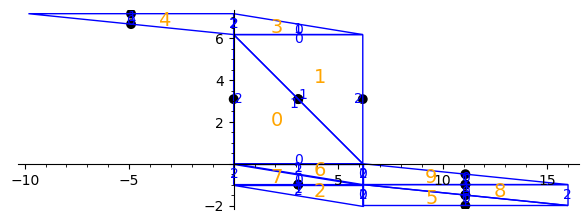

In [55]:
mark_points(prym, weierstrass).plot()

In [ ]:
preserved_pts = reduce_periodic_points(prym, weierstrass, veech_gens, True)

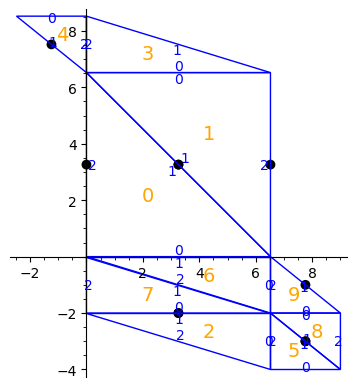

The preserved points are  {(4, (0, 1/2, 1/2)), (0, (0, 1/2, 1/2)), (2, (0, 1/2, 1/2)), (8, (0, 1/2, 1/2)), (0, (1/2, 0, 1/2)), (1, (1/2, 0, 1/2))}


In [35]:
mark_points(prym, preserved_pts).plot().show()
print("The preserved points are ", preserved_pts)

In [57]:
# find the vertical and horizontal sheers
for i, elem in enumerate(veech_gens):
    if(elem[0][1] == 0):
        print(i, elem)

26 [            -1              0]
[1/32*a + 31/32             -1]
28 [             1              0]
[1/32*a + 31/32              1]


In [58]:
vert_sheer = veech_gens[26]
horiz_sheer = veech_gens[13]

In [61]:
len(candidate_points), len(preserved_pts)

(2369, 481)

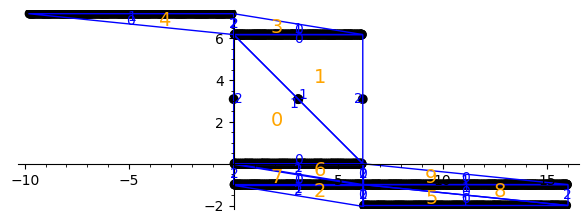

{(0, (0, 1/2, 1/2)),
 (0, (133/1572*a - 499/524, -133/1572*a + 1023/524, 0)),
 (0, (7/40*a - 79/40, -7/40*a + 119/40, 0)),
 (0, (133/786*a - 499/262, -133/786*a + 761/262, 0)),
 (0, (7/20*a - 79/20, -7/20*a + 99/20, 0)),
 (0, (133/524*a - 1497/524, -133/524*a + 2021/524, 0)),
 (0, (3/52*a - 97/156, -3/52*a + 253/156, 0)),
 (0, (21/40*a - 237/40, -21/40*a + 277/40, 0)),
 (0, (1/156*a - 5/156, -1/156*a + 161/156, 0)),
 (0, (211/524*a - 2371/524, -211/524*a + 2895/524, 0)),
 (0, (7/10*a - 79/10, -7/10*a + 89/10, 0)),
 (0, (383/786*a - 1435/262, -383/786*a + 1697/262, 0)),
 (0, (7/8*a - 79/8, -7/8*a + 87/8, 0)),
 (0, (899/1572*a - 3369/524, -899/1572*a + 3893/524, 0)),
 (0, (5/78*a - 17/26, -5/78*a + 43/26, 0)),
 (0, (21/20*a - 237/20, -21/20*a + 257/20, 0)),
 (0, (741/2612*a - 8189/2612, -741/2612*a + 10801/2612, 0)),
 (0, (1/4*a - 11/4, -1/4*a + 15/4, 0)),
 (0, (643/2612*a - 7039/2612, -643/2612*a + 9651/2612, 0)),
 (0, (27/128*a - 293/128, -27/128*a + 421/128, 0)),
 (0, (545/2612*a - 58

In [62]:
preserved_pts = points_preserved(prym, horiz_sheer, candidate_points)
mark_points(prym, preserved_pts).plot().show()
preserved_pts